<a href="https://colab.research.google.com/github/kd0176/Yes-Bank-Stock-Closing-Price-Prediction/blob/main/Yes_Bank_Stock_Closing_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project Name - Yes Bank Stock Closing Price Prediction**



##### **Project Type -**     Regression


# **Problem Statement**


### 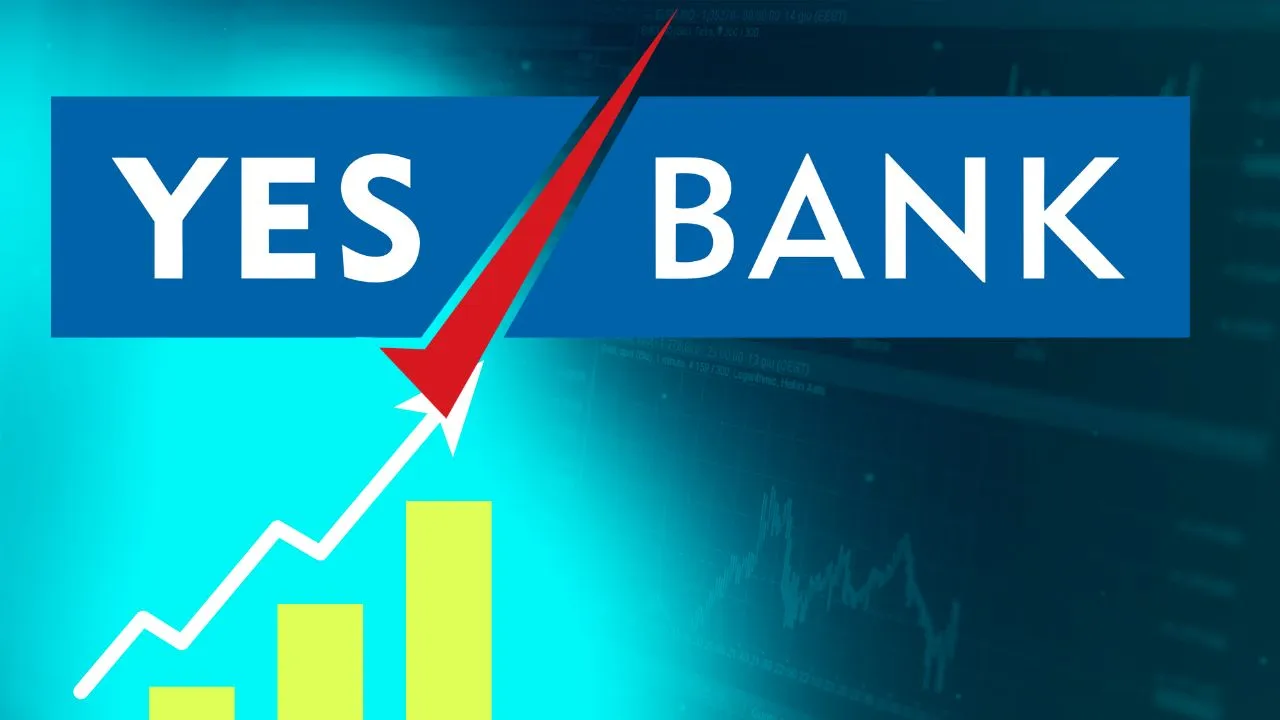Yes Bank is a well-known bank in the Indian financial domain. Since 2018, it has been in news because of the fraud case involving Rana Kapoor. Owing to this fact, it was interesting to see how that impacted the stock prices of the company and whether Time series models or any other predictive models can do justice to such situations. This dataset has monthly stock prices of the bank since its inception and includes closing, starting, highest and lowest stock prices of every month. The main objective is to predict the stock's closing price of the month.

# **General Guidelines** : -  

1.   Well-structured, formatted, and commented code is required. 
2.   Exception Handling, Production Grade Code & Deployment Ready Code will be a plus. Those students will be awarded some additional credits. 
     
     The additional credits will have advantages over other students during Star Student selection.
       
             [ Note: - Deployment Ready Code is defined as, the whole .ipynb notebook should be executable in one go
                       without a single error logged. ]

3.   Each and every logic should have proper comments.
4. You may add as many number of charts you want. Make Sure for each and every chart the following format should be answered.
        

```
# Chart visualization code
```
            

*   Why did you pick the specific chart?
*   What is/are the insight(s) found from the chart?
* Will the gained insights help creating a positive business impact? 
Are there any insights that lead to negative growth? Justify with specific reason.

5. You have to create at least 15 logical & meaningful charts having important insights.


[ Hints : - Do the Vizualization in  a structured way while following "UBM" Rule. 

U - Univariate Analysis,

B - Bivariate Analysis (Numerical - Categorical, Numerical - Numerical, Categorical - Categorical)

M - Multivariate Analysis
 ]





6. You may add more ml algorithms for model creation. Make sure for each and every algorithm, the following format should be answered.


*   Explain the ML Model used and it's performance using Evaluation metric Score Chart.


*   Cross- Validation & Hyperparameter Tuning

*   Have you seen any improvement? Note down the improvement with updates Evaluation metric Score Chart.

*   Explain each evaluation metric's indication towards business and the business impact pf the ML model used.




















# ***Let's Begin !***

## ***1. Know Your Data***

### Import Libraries

In [1]:
# Import Libraries
import numpy as np                                   # numerical computations
import pandas as pd                                  # data analyze

import seaborn as sns                                # data visualization
import matplotlib.pyplot as plt
%matplotlib inline

import warnings                                      # Ignore warnings
warnings.filterwarnings("ignore")

from datetime import datetime                        # To play with datetime object

from scipy.stats import uniform                      # For hypothesis testing
from scipy.stats import norm
from scipy.stats import chi2
from scipy.stats import t
from scipy.stats import f



### Dataset Loading

In [2]:
# Load Dataset
url='https://drive.google.com/file/d/1QE_J9JP9tFgFgzCNOfPt99uaPn08ZpbP/view?usp=sharing'
url='https://drive.google.com/uc?id=' + url.split('/')[-2]
df = pd.read_csv(url)

### Dataset First View

In [3]:
# Dataset First Look
df.head()

,Date,Open,High,Low,Close
0,Jul-05,13.00,14.00,11.25,12.46
1,Aug-05,12.58,14.88,12.55,13.42
2,Sep-05,13.48,14.87,12.27,13.30
3,Oct-05,13.20,14.47,12.40,12.99
4,Nov-05,13.35,13.88,12.88,13.41


### Dataset Rows & Columns count

In [4]:
# Dataset Rows & Columns count
df.shape

(185, 5)

### Dataset Information

In [5]:
# Dataset Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 185 entries, 0 to 184
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    185 non-null    object 
 1   Open    185 non-null    float64
 2   High    185 non-null    float64
 3   Low     185 non-null    float64
 4   Close   185 non-null    float64
dtypes: float64(4), object(1)
memory usage: 7.4+ KB


#### Duplicate Values

In [6]:
# Dataset Duplicate Value Count
df[df.duplicated()]

,Date,Open,High,Low,Close


#### Missing Values/Null Values

In [7]:
# Missing Values/Null Values Count
df.isnull().sum()

Date     0
Open     0
High     0
Low      0
Close    0
dtype: int64

Text(0.5, 1.0, 'Visualizing the missing values')

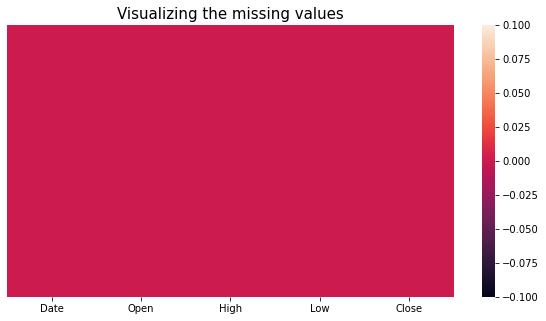

In [8]:
# Visualizing the missing values
# Checking Null Value by plotting Heatmap
plt.figure(figsize = (10,5))
sns.heatmap(df.isnull(), cbar=True, annot=False, yticklabels=False)
plt.title('Visualizing the missing values', fontsize = 15)

### What did you know about your dataset?

*   There are 185 rows and 5 columns in the dataset
*   No duplicate rows.
*   No missing values in the dataset.


## ***2. Understanding Your Variables***

In [9]:
# Dataset Columns
df.columns

Index(['Date', 'Open', 'High', 'Low', 'Close'], dtype='object')

In [10]:
# Dataset Describe
df.describe(include='all')

,Date,Open,High,Low,Close
count,185,185.000000,185.000000,185.000000,185.000000
unique,185,NaN,NaN,NaN,NaN
top,Jul-05,NaN,NaN,NaN,NaN
freq,1,NaN,NaN,NaN,NaN
mean,NaN,105.541405,116.104324,94.947838,105.204703
std,NaN,98.879850,106.333497,91.219415,98.583153
min,NaN,10.000000,11.240000,5.550000,9.980000
25%,NaN,33.800000,36.140000,28.510000,33.450000
50%,NaN,62.980000,72.550000,58.000000,62.540000
75%,NaN,153.000000,169.190000,138.350000,153.300000


### Variables Description 

* **Date :** Date of record.

* **Open :** Opening price.

* **High :** Highest price in the month.

* **Low :** Lowest price in the month.

* **Close :** Closing price.

### Check Unique Values for each variable.

In [11]:
# Check Unique Values for each variable.
for i in df.columns.tolist():
  print("unique value count in",i,"is",df[i].nunique())

unique value count in Date is 185
unique value count in Open is 183
unique value count in High is 184
unique value count in Low is 183
unique value count in Close is 185
